In [12]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


Import the folder of images

In [4]:
import pathlib
dataset_source = 'vehicle/train/train'

data_dir = pathlib.Path(dataset_source)

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10091


Show the image from source

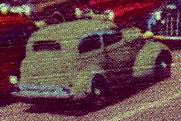

In [6]:
cars = list(data_dir.glob('Car/*'))
PIL.Image.open(str(cars[0]))

Create a dataset

In [8]:
batch_size = 100
img_height = 256
img_width = 256

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10091 files belonging to 9 classes.
Using 8073 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10091 files belonging to 9 classes.
Using 2018 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['Bicycle', 'Boat', 'Bus', 'Car', 'Helicopter', 'Motorcycle', 'Tank', 'Truck', 'Van']


Visualize the data

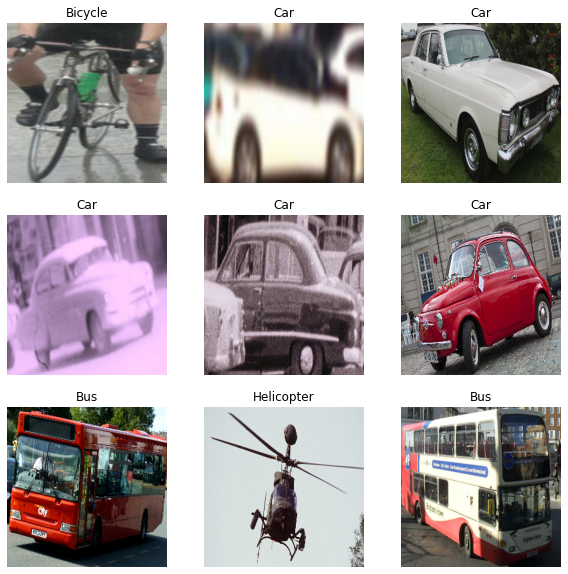

In [14]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Standardize the data

In [15]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)